In [1]:
# import needed libriaries

# ema_workbench components needed
from ema_workbench.analysis import prim
from ema_workbench import MultiprocessingEvaluator, ema_logging
from ema_workbench.analysis import parcoords

# other libraries needed
import pickle # to read dictionaries
import pandas as pd # to deal with csv files and manipulate dataframes
import numpy as np # for conversion purposes
import matplotlib.pyplot as plt # to plot

import warnings
warnings.filterwarnings("ignore")

C:\Users\ludov\anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(


## Scenario Discovery 

After having re-evaluated the policies for the different scenarios we aim to investigate when these policies have a poor performance. To achieve that we use the PRIM algorithm.

In [2]:
# read the outcomes' results of the policy re-evaluation (step2)

outcomes_file = open("intermediate outputs/step2 - first re-evaluation - outcomes description.pkl", "rb")
outcomes = pickle.load(outcomes_file)

In [3]:
# read the experiments' results of the policy re-evaluation (step2)
experiments = pd.read_csv('intermediate outputs/step2 - first re-evaluation - experiments description.csv')

In [4]:
ema_logging.log_to_stderr(ema_logging.INFO);

In [5]:
# selecting the policies that perform bad in terms of the death number in the dikes which are on our interest
#the 0.001 threshold was chosen by trial and error in an effort to have enough data for a meaningful analysis
outcomes_prim = []
for i in range(len(outcomes['A.4_Expected Number of Deaths'])):
    if outcomes['A.4_Expected Number of Deaths'][i] > 0.001 and outcomes['A.5_Expected Number of Deaths'][i] > 0.001 :
        outcomes_prim.append(True)
    else:
        outcomes_prim.append(False)

In [6]:
#count the number of True elements in the outcomes_prim list to check the amount of data that satisfy the defined threshold
count = 0
for i in outcomes_prim:
    if i is True:
        count =+ 1
        
print((count/len(outcomes_prim)*100))

0.02702702702702703


In [7]:
outcomes_prim = np.asarray(outcomes_prim) # convert the list into an array 


x = experiments.drop(columns=['0_RfR 0', '0_RfR 1', '0_RfR 2', #keep only the uncertainties' columns
       '1_RfR 0', '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2',
       '3_RfR 0', '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'EWS_DaysToThreat', 'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1',
       'A.1_DikeIncrease 2', 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1',
       'A.2_DikeIncrease 2', 'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1',
       'A.3_DikeIncrease 2', 'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1',
       'A.4_DikeIncrease 2', 'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1',
       'A.5_DikeIncrease 2','policy'])
y = outcomes_prim                    

#run the RPIM algorithm
prim_alg = prim.Prim(x,y, threshold=0.5)
box = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 3700 points remaining, containing 323 cases of interest
[MainProcess/INFO] mean: 0.7792792792792793, mass: 0.06, coverage: 0.5356037151702786, density: 0.7792792792792793 restricted_dimensions: 9


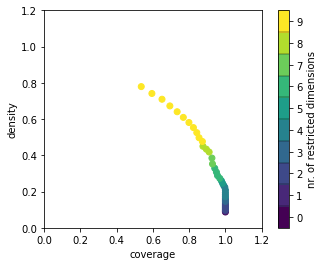

In [8]:
#plot density vs coverage
box.show_tradeoff()
plt.savefig('output pictures/step4 - first prim scenario discovery results - density vs coverage.png')
plt.show()

In [9]:
box.peeling_trajectory #investigating the coverage and density values for all boxes

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.087297,0.0,1.00,0.087297,0
1,1.000000,0.091892,1.0,0.95,0.091892,1
2,1.000000,0.096997,2.0,0.90,0.096997,2
3,1.000000,0.102703,3.0,0.85,0.102703,2
4,1.000000,0.109122,4.0,0.80,0.109122,2
5,1.000000,0.114865,5.0,0.76,0.114865,2
6,1.000000,0.121246,6.0,0.72,0.121246,2
7,1.000000,0.128378,7.0,0.68,0.128378,2
8,1.000000,0.136402,8.0,0.64,0.136402,2
9,1.000000,0.145495,9.0,0.60,0.145495,3


In [10]:
#explore the characteristics of the chosen box
# box 36 was chosen as it offers a good combination of relatively high density and coverage at the same time
box.inspect(36) 

coverage     0.693498
density      0.672673
id          36.000000
mass         0.090000
mean         0.672673
res_dim      9.000000
Name: 36, dtype: float64

                             box 36              \
                                min         max   
A.5_pfail                  0.007751    0.466340   
A.3_Bmax                  31.652959  328.831854   
A.0_ID flood wave shape    0.000000  110.000000   
A.1_pfail                  0.162936    0.998602   
A.4_pfail                  0.066726    0.499678   
A.2_pfail                  0.206623    0.990317   
A.1_Bmax                 100.122000  292.146732   
A.4_Bmax                  36.410216  339.244047   
A.5_Bmax                  70.436244  331.882111   

                                                                       
                                                            qp values  
A.5_pfail                               [-1.0, 6.769571617673648e-30]  
A.3_Bmax                                 [-1.0, 0.00867558350105

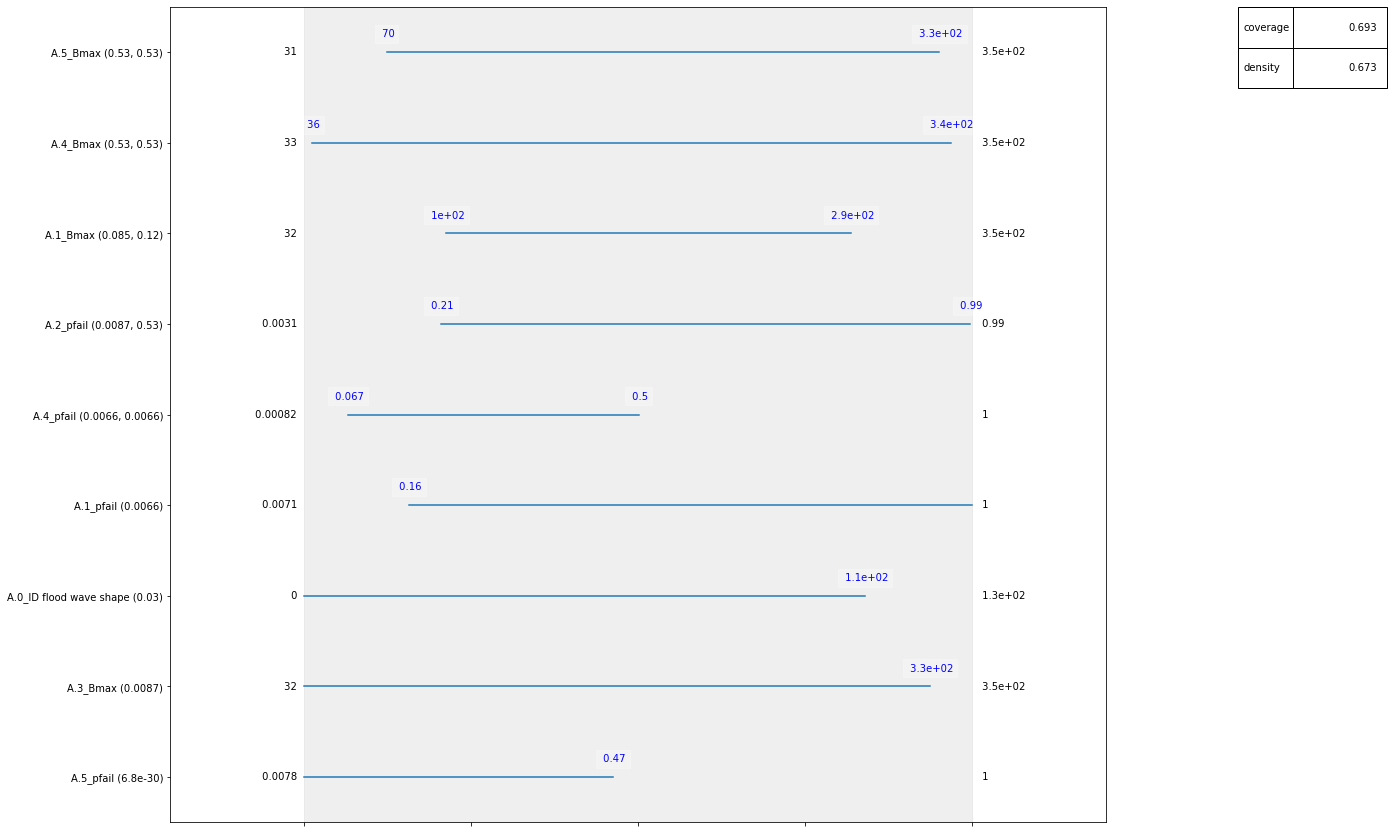

In [17]:
#explore the characteristics of the chosen box
box.select(36)
box.inspect(style='graph')
plt.savefig('output pictures/step4 - first prim scenario discovery results - box 36 description.png')
#plt.rcParams["figure.figsize"]=(20,15) # fix the size of the picture
plt.show()

In [14]:
# save the results
scens_in_box = experiments.iloc[box.yi]
outcomes_in_box = {k:v[box.yi] for k,v in outcomes.items()}

scens_in_box.to_csv('intermediate outputs/step4 - prim results - scens in box.csv')
a_file = open("intermediate outputs/step4 - prim results - outcomes in box.pkl", "wb")
pickle.dump(outcomes_in_box, a_file)
a_file.close()

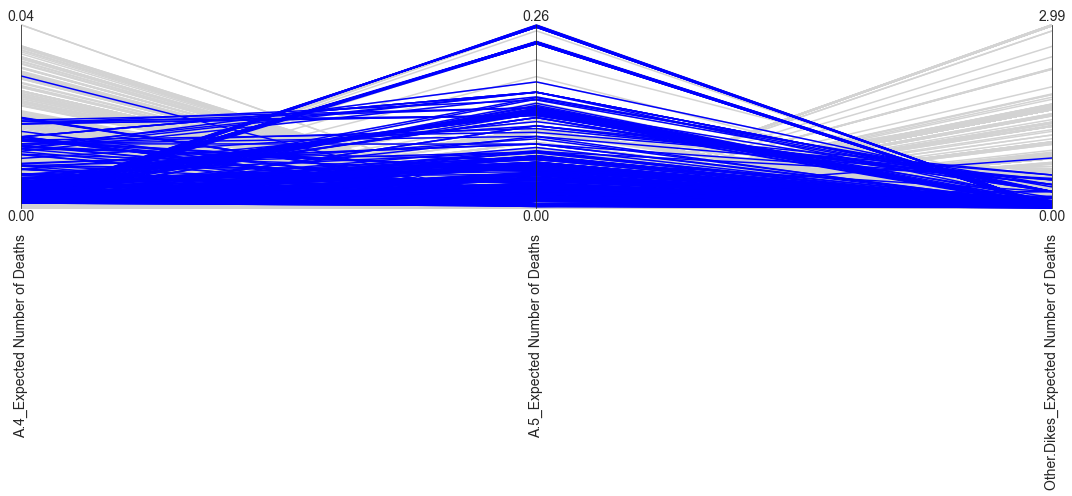

In [15]:
#plot and highlight the death outcomes of the policies that perform badly 
data = pd.DataFrame({k:v[y] for k,v in outcomes.items()})
all_data = pd.DataFrame({k:v for k,v in outcomes.items()})

selected_data = all_data[['A.4_Expected Number of Deaths','A.5_Expected Number of Deaths','Other.Dikes_Expected Number of Deaths']]

limits = parcoords.get_limits(selected_data)
plt.rcParams["figure.figsize"] = (15,7)
axes = parcoords.ParallelAxes(limits)
axes.plot(all_data, color='lightgrey')
axes.plot(data, color='blue')

plt.show()


In [16]:
# print the indices of the scenarios with the maximum and minimum death outcomes respectively
print(selected_data.idxmax())
print(selected_data.idxmin())

A.4_Expected Number of Deaths             887
A.5_Expected Number of Deaths            2476
Other.Dikes_Expected Number of Deaths     863
dtype: int64
A.4_Expected Number of Deaths            0
A.5_Expected Number of Deaths            0
Other.Dikes_Expected Number of Deaths    1
dtype: int64


In [17]:
# select the worst case scenarios (those with the maximum death outcomes)
selected = experiments.loc[[887,2476,863], ['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate',
       'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax',
       'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail',
       'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0',
       'discount rate 1', 'discount rate 2']] #keep only the uncertainty columns
selected

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2
887,25,40.770650,1.0,0.742590,98.410441,1.0,0.067249,209.668458,10.0,0.719802,45.128570,1.0,0.000821,135.083179,10.0,0.156476,4.5,2.5,1.5
2476,45,117.176284,1.0,0.946148,132.559754,1.5,0.412481,304.418095,1.5,0.652990,249.033968,1.5,0.473411,243.549286,1.0,0.033733,1.5,3.5,2.5
863,23,68.676375,10.0,0.802261,140.824284,10.0,0.761561,265.662429,1.5,0.003890,294.052841,10.0,0.269397,42.535374,1.0,0.389347,1.5,2.5,2.5


In [18]:
#save the results
selected.to_csv('intermediate outputs/step4 - prim results - worst case scenarios.csv')